<a href="https://colab.research.google.com/github/RahmanMonty/Unemployment/blob/master/Unemployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns ; sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# As the CoronaVirus keeps many of us in quarantine and isolation, a lot of jobs that are considered non-essential restricts us
# from going to work and getting paid. As this problem continues, the nation is experiencing higher then usual unemployment claims. This project
# will explore the populations of states that have applied for unemployment benefits, the unique pay that each state offers, and how they compare
# to one another.

In [0]:
df = pd.read_csv("State Unemployment Data.csv")
df2 = pd.read_csv("Unemployment Max Pay.csv",encoding='latin1')

In [61]:
df.head()

,State,unemploymentRateRank,unemploymentRate,Pop
0,South Carolina,1,0.023,5210095
1,Utah,1,0.023,3282115
2,Vermont,1,0.023,628061
3,North Dakota,4,0.024,761723
4,Colorado,5,0.025,5845526


In [62]:
df2[["State","Max.Weekly Benefits","Max. DA Allowance"]].head()

,State,Max.Weekly Benefits,Max. DA Allowance
0,Alaska,$370,$72
1,Alabama,$265,NaN
2,Arkansas,$451,NaN
3,Arizona,$240,NaN
4,California,$450,NaN


In [63]:
#Because some of the Max. DA Allowance does not have values present we will use the fillna method to fill them with zeros
df2.fillna(0)

,State,Unemp Rate,Max Weeks of Benefits,Max.Weekly Benefits,Max. DA Allowance,Total Weekly Benefits
0,Alaska,7.1,26,$370,$72,$442
1,Alabama,4.1,26,$265,0,$265
2,Arkansas,3.8,20,$451,0,$451
3,Arizona,4.7,26,$240,0,$240
4,California,4.2,26,$450,0,$450
5,Colorado,2.7,26,$597,0,$597
6,Connecticut,4.4,26,$631,$75,$706
7,Dist of Columbia,5.6,26,$425,0,$425
8,Delaware,3.9,26,$330,0,$330
9,Florida,3.8,12,$275,0,$275


In [64]:
# Here we want to determine the actual number of unemployed individual of the states population 
# and add it to our data frame that wasn't originally in the CSV file.
df["Unemployed"] = df["Pop"] * df["unemploymentRate"]
df.head()

,State,unemploymentRateRank,unemploymentRate,Pop,Unemployed
0,South Carolina,1,0.023,5210095,119832.185
1,Utah,1,0.023,3282115,75488.645
2,Vermont,1,0.023,628061,14445.403
3,North Dakota,4,0.024,761723,18281.352
4,Colorado,5,0.025,5845526,146138.150


In [65]:
df.tail()

,State,unemploymentRateRank,unemploymentRate,Pop,Unemployed
45,Louisiana,47,0.049,4645184,227614.016
46,West Virginia,48,0.050,1778070,88903.500
47,District of Columbia,49,0.053,720687,38196.411
48,Mississippi,50,0.057,2989260,170387.820
49,Alaska,51,0.061,734002,44774.122


In [97]:
# Now we will combine the two data frames to get an easier look at the data

join = pd.concat([df,df2[["Max.Weekly Benefits"]]], axis = 1)
join.head(10)

,State,unemploymentRateRank,unemploymentRate,Pop,Unemployed,Max.Weekly Benefits
0,South Carolina,1.0,0.023,5210095.0,119832.185,$370
1,Utah,1.0,0.023,3282115.0,75488.645,$265
2,Vermont,1.0,0.023,628061.0,14445.403,$451
3,North Dakota,4.0,0.024,761723.0,18281.352,$240
4,Colorado,5.0,0.025,5845526.0,146138.150,$450
5,Hawaii,6.0,0.026,1412687.0,36729.862,$597
6,New Hampshire,6.0,0.026,1371246.0,35652.396,$631
7,Virginia,6.0,0.026,8626207.0,224281.382,$425
8,Alabama,9.0,0.026,4908621.0,127624.146,$330
9,Iowa,9.0,0.026,3179849.0,82676.074,$275


In [0]:
# In order to find the states that spend the most money on its citizens we must remove the $ sign from the Weekly Benefits Column
# So that we can do some manipulation of the data frames
join['Max.Weekly Benefits'] = join['Max.Weekly Benefits'].str.replace(',', '').str.replace('$', '').astype(int)

In [99]:
#Now with the data frames combined we can see which state pays the largest amount of unemployment to its citizens!
join["Most Money"] = join["Unemployed"] * join["Max.Weekly Benefits"]
join[["State", "Unemployed", "Max.Weekly Benefits", "Most Money"]]

,State,Unemployed,Max.Weekly Benefits,Most Money
0,South Carolina,119832.185,370,4.433791e+07
1,Utah,75488.645,265,2.000449e+07
2,Vermont,14445.403,451,6.514877e+06
3,North Dakota,18281.352,240,4.387524e+06
4,Colorado,146138.150,450,6.576217e+07
5,Hawaii,36729.862,597,2.192773e+07
6,New Hampshire,35652.396,631,2.249666e+07
7,Virginia,224281.382,425,9.531959e+07
8,Alabama,127624.146,330,4.211597e+07
9,Iowa,82676.074,275,2.273592e+07


In [93]:
# From this data we can see that California, Texas, and New York pay out the most unemployment to their citizens
# Taking into consideration the states population and the benefits they offer.
LuckyPeople = join.nlargest(10, "Most Money")
LuckyPeople[["State", "Unemployed", "Max.Weekly Benefits", "Most Money"]]

,State,Unemployed,Max.Weekly Benefits,Most Money
35,California,1557562.071,598,9.314221e+08
26,Texas,1031530.325,487,5.023553e+08
38,New York,777618.760,561,4.362441e+08
39,Ohio,493403.148,566,2.792662e+08
31,North Carolina,392638.894,696,2.732767e+08
13,Florida,659789.550,405,2.672148e+08
37,Michigan,391756.131,538,2.107648e+08
30,Illinois,468408.234,427,2.000103e+08
43,Arizona,339410.724,507,1.720812e+08
42,Pennsylvania,576939.510,275,1.586584e+08


In [0]:
LuckyPeople1 = LuckyPeople.nsmallest(10, "Most Money")

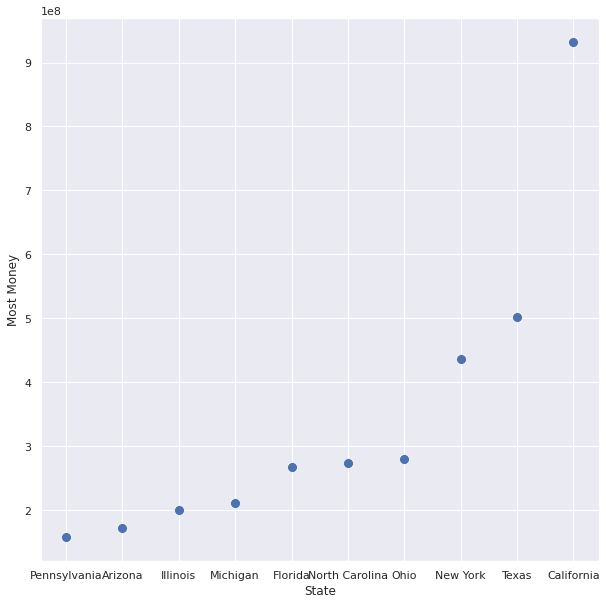

In [104]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = "State", y = "Most Money", data = LuckyPeople1, s =100 )

ax

In [0]:
# Because I wasn't able to find any data sets showing the different demographics that recieve unemployment.
#

In [102]:
join.describe()

,unemploymentRateRank,unemploymentRate,Pop,Unemployed,Max.Weekly Benefits,Most Money
count,50.000000,50.000000,5.000000e+01,5.000000e+01,51.000000,5.000000e+01
mean,25.400000,0.035620,6.605257e+06,2.378214e+05,464.058824,1.134125e+08
std,15.141509,0.008808,7.485259e+06,2.825675e+05,138.078588,1.574929e+08
min,1.000000,0.023000,5.670250e+05,1.444540e+04,235.000000,4.387524e+06
25%,12.500000,0.029250,1.857760e+06,6.426941e+04,362.500000,2.979780e+07
50%,26.000000,0.034500,4.572438e+06,1.526392e+05,442.000000,6.246373e+07
75%,37.000000,0.039000,7.692445e+06,2.914901e+05,563.500000,1.307729e+08
max,51.000000,0.061000,3.993749e+07,1.557562e+06,795.000000,9.314221e+08
